# Emergency Department Capacity Gaps and Operational Bottlenecks Analysis
## California Hospital Emergency Departments (2021-2023)

**Author:** Aniruddha Mukherjee (23F1003186)  
**Project:** Optimizing Emergency Department Operations  
**Data Source:** California Department of Health Care Access and Information (HCAI)

---

## Executive Summary

This analysis examines the relationship between ED encounter volumes and available treatment capacity across California facilities (2021-2023). The study aims to identify:

1. **Supply-Demand Mismatches:** Which facilities operate with inadequate capacity relative to demand?
2. **Operational Bottlenecks:** Where are the most severe capacity constraints?
3. **Geographic Disparities:** How do capacity gaps vary across regions and urban/rural settings?

Understanding these patterns is critical for strategic capacity expansion, resource allocation, and operational efficiency improvements.

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure quality
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✓ Libraries imported successfully
Analysis Date: 2025-12-03 23:50:29


In [2]:
# Load the ED Volume and Capacity dataset
data_path = 'data/ed-volume/emergency-department-volume-and-capacity-2021-2023.csv'

# Try different encodings to handle non-UTF-8 files
try:
    df = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(data_path, encoding='latin-1')
        print("⚠️  File loaded with 'latin-1' encoding")
    except UnicodeDecodeError:
        df = pd.read_csv(data_path, encoding='cp1252')
        print("⚠️  File loaded with 'cp1252' encoding")

print(f"✓ Dataset loaded successfully!")
print(f"Total Records: {len(df):,}")
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


⚠️  File loaded with 'latin-1' encoding
✓ Dataset loaded successfully!
Total Records: 12,849
Dataset Shape: (12849, 18)

Column Names:
 1. oshpd_id
 2. FacilityName2
 3. CountyName
 4. system
 5. year
 6. LICENSED_BED_SIZE
 7. HospitalOwnership
 8. UrbanRuralDesi
 9. TEACHINGDesignation
10. Category
11. Tot_ED_NmbVsts
12. EDStations
13. EDDXCount
14. LATITUDE
15. LONGITUDE
16. PrimaryCareShortageArea
17. MentalHealthShortageArea
18. Visits_Per_Station


## 2. Data Exploration and Understanding

In [3]:
# Display sample records
print("Sample Data (First 10 Records):")
print("=" * 120)
df.head(10)


Sample Data (First 10 Records):


,oshpd_id,FacilityName2,CountyName,system,year,LICENSED_BED_SIZE,HospitalOwnership,UrbanRuralDesi,TEACHINGDesignation,Category,Tot_ED_NmbVsts,EDStations,EDDXCount,LATITUDE,LONGITUDE,PrimaryCareShortageArea,MentalHealthShortageArea,Visits_Per_Station
0,106010735,Alameda Hospital,Alameda,Alameda Health System,2022,100-149,Government,Urban,Non-Teaching,Active COVID-19,13579,12.0,520,37.762660,-122.253991,No,No,43.333333
1,106010739,Alta Bates Summit Medical Center Ð Alta Bates ...,Alameda,Sutter Health,2022,300-499,Nonprofit,Urban,Non-Teaching,Active COVID-19,29760,22.0,1177,37.856450,-122.257430,No,No,53.500000
2,106010776,UC San Francisco Benioff Children's Hospital O...,Alameda,NaN,2022,150-199,Nonprofit,Urban,Teaching,Active COVID-19,35062,40.0,1822,37.837220,-122.267470,No,No,45.550000
3,106010846,Highland Hospital,Alameda,Alameda Health System,2022,200-299,Government,Urban,Non-Teaching,Active COVID-19,66095,53.0,2109,37.799250,-122.231380,No,No,39.792453
4,106010937,Alta Bates Summit Medical Center,Alameda,Sutter Health,2022,300-499,Nonprofit,Urban,Non-Teaching,Active COVID-19,29336,30.0,1325,37.821060,-122.262570,No,No,44.166667
5,106010987,Washington Hospital Ð Fremont,Alameda,NaN,2022,300-499,Government,Urban,Non-Teaching,Active COVID-19,43964,39.0,3013,37.558470,-121.980060,No,No,77.256410
6,106014050,Stanford Health Care Tri-Valley,Alameda,NaN,2022,150-199,Nonprofit,Urban,Non-Teaching,Active COVID-19,28620,17.0,1378,37.692060,-121.880950,No,No,81.058824
7,106014132,Kaiser Foundation Hospital Ð Fremont,Alameda,Kaiser Foundation Hospitals,2022,100-149,Nonprofit,Urban,Non-Teaching,Active COVID-19,38960,18.0,1487,37.550550,-121.974830,No,No,82.611111
8,106014233,Eden Medical Center,Alameda,Sutter Health,2022,100-149,Nonprofit,Urban,Non-Teaching,Active COVID-19,31062,22.0,1467,37.698377,-122.087406,No,No,66.681818
9,106014326,Kaiser Foundation Hospital Ð Oakland/Richmond,Alameda,Kaiser Foundation Hospitals,2022,300-499,Nonprofit,Urban,Non-Teaching,Active COVID-19,120088,80.0,4883,37.824020,-122.257910,No,No,61.037500


In [4]:
# Dataset information
print("Dataset Information:")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("Key Variables:")
print("=" * 80)
print(f"Years covered: {sorted(df['year'].unique())}")
print(f"Unique facilities: {df['FacilityName2'].nunique()}")
print(f"Counties: {df['CountyName'].nunique()}")
print(f"Urban/Rural categories: {df['UrbanRuralDesi'].unique()}")
print(f"\nHealth categories tracked: {df['Category'].nunique()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12849 entries, 0 to 12848
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   oshpd_id                  12849 non-null  int64  
 1   FacilityName2             12849 non-null  object 
 2   CountyName                12849 non-null  object 
 3   system                    9259 non-null   object 
 4   year                      12849 non-null  int64  
 5   LICENSED_BED_SIZE         12849 non-null  object 
 6   HospitalOwnership         12849 non-null  object 
 7   UrbanRuralDesi            12849 non-null  object 
 8   TEACHINGDesignation       12849 non-null  object 
 9   Category                  12849 non-null  object 
 10  Tot_ED_NmbVsts            12849 non-null  int64  
 11  EDStations                12832 non-null  float64
 12  EDDXCount                 12849 non-null  int64  
 13  LATITUDE                  12849 non-null

In [5]:
# Descriptive statistics for key metrics
print("Descriptive Statistics for Capacity Metrics:")
print("=" * 80)
capacity_cols = ['Tot_ED_NmbVsts', 'EDStations', 'Visits_Per_Station']
df[capacity_cols].describe().round(2)


Descriptive Statistics for Capacity Metrics:


,Tot_ED_NmbVsts,EDStations,Visits_Per_Station
count,12849.00,12832.00,12832.00
mean,39642.07,28.60,138.75
std,26917.29,20.76,376.13
min,511.00,1.00,0.00
25%,18962.00,12.00,5.11
50%,33711.00,24.00,22.87
75%,54542.00,40.00,84.27
max,146799.00,114.00,4714.00


In [6]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 80)
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing) > 0:
    print(missing.to_string(index=False))
else:
    print("✓ No missing values found!")


Missing Values Analysis:
            Column  Missing Count  Missing %
            system           3590      27.94
        EDStations             17       0.13
Visits_Per_Station             17       0.13


## 3. Data Cleaning and Preparation

In [7]:
# Create clean working copy
df_clean = df.copy()

# Clean facility and county names
df_clean['FacilityName2'] = df_clean['FacilityName2'].str.strip()
df_clean['CountyName'] = df_clean['CountyName'].str.strip().str.title()

# Ensure numeric columns are properly typed
numeric_cols = ['Tot_ED_NmbVsts', 'EDStations', 'Visits_Per_Station']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Remove records with missing critical data
df_clean = df_clean.dropna(subset=['Tot_ED_NmbVsts', 'EDStations', 'Visits_Per_Station'])

# Calculate burden ratio if not present or validate existing
df_clean['Burden_Ratio'] = df_clean['Tot_ED_NmbVsts'] / df_clean['EDStations']

print(f"✓ Data cleaning completed")
print(f"Records after cleaning: {len(df_clean):,}")
print(f"Records removed: {len(df) - len(df_clean):,}")


✓ Data cleaning completed
Records after cleaning: 12,832
Records removed: 17


In [8]:
# Create burden categorization
def categorize_burden(ratio):
    """Categorize facilities by operational burden level"""
    if ratio >= 3000:
        return 'Critical (>3000)'
    elif ratio >= 2000:
        return 'High (2000-3000)'
    elif ratio >= 1000:
        return 'Moderate (1000-2000)'
    else:
        return 'Adequate (<1000)'

df_clean['Burden_Category'] = df_clean['Burden_Ratio'].apply(categorize_burden)

# Create yearly aggregates
yearly_stats = df_clean.groupby('year').agg({
    'Tot_ED_NmbVsts': 'sum',
    'EDStations': 'sum',
    'Burden_Ratio': 'mean',
    'FacilityName2': 'nunique'
}).reset_index()
yearly_stats.columns = ['Year', 'Total_Encounters', 'Total_Stations', 'Avg_Burden_Ratio', 'Num_Facilities']

print("✓ Burden categorization completed")
print("\nBurden Category Distribution:")
print(df_clean['Burden_Category'].value_counts().sort_index())


✓ Burden categorization completed

Burden Category Distribution:
Burden_Category
Adequate (<1000)        2568
Critical (>3000)         306
High (2000-3000)        1715
Moderate (1000-2000)    8243
Name: count, dtype: int64


---

## 4. Capacity Gap Analysis: Overall Burden Assessment

In [9]:
# Calculate system-wide capacity statistics
print("="*80)
print("SYSTEM-WIDE CAPACITY ANALYSIS (2021-2023)")
print("="*80)

total_encounters = df_clean['Tot_ED_NmbVsts'].sum()
total_stations = df_clean['EDStations'].sum()
avg_burden = df_clean['Burden_Ratio'].mean()
median_burden = df_clean['Burden_Ratio'].median()

print(f"\nTotal ED Encounters (2021-2023): {total_encounters:,.0f}")
print(f"Total Treatment Stations: {total_stations:,.0f}")
print(f"Average Burden Ratio: {avg_burden:,.2f} encounters/station")
print(f"Median Burden Ratio: {median_burden:,.2f} encounters/station")

# Facilities by burden category
burden_counts = df_clean['Burden_Category'].value_counts()
total_facilities = len(df_clean)

print(f"\n{'='*80}")
print("FACILITIES BY OPERATIONAL BURDEN:")
print(f"{'='*80}")
for category in ['Critical (>3000)', 'High (2000-3000)', 'Moderate (1000-2000)', 'Adequate (<1000)']:
    count = burden_counts.get(category, 0)
    pct = (count / total_facilities) * 100
    print(f"{category:30s}: {count:4d} facilities ({pct:5.2f}%)")

critical_count = burden_counts.get('Critical (>3000)', 0)
print(f"\n⚠️  {critical_count} facilities operate with CRITICAL burden ratio > 3,000")
print(f"⚠️  {burden_counts.get('High (2000-3000)', 0)} facilities have HIGH burden (2000-3000)")

# Recommended threshold analysis
recommended_threshold = 2000  # Industry standard benchmark
above_threshold = (df_clean['Burden_Ratio'] > recommended_threshold).sum()
pct_above = (above_threshold / total_facilities) * 100

print(f"\n✓ {pct_above:.1f}% of facilities operate above recommended threshold ({recommended_threshold} encounters/station)")


SYSTEM-WIDE CAPACITY ANALYSIS (2021-2023)

Total ED Encounters (2021-2023): 509,005,389
Total Treatment Stations: 366,945
Average Burden Ratio: 1,487.28 encounters/station
Median Burden Ratio: 1,385.61 encounters/station

FACILITIES BY OPERATIONAL BURDEN:
Critical (>3000)              :  306 facilities ( 2.38%)
High (2000-3000)              : 1715 facilities (13.37%)
Moderate (1000-2000)          : 8243 facilities (64.24%)
Adequate (<1000)              : 2568 facilities (20.01%)

⚠️  306 facilities operate with CRITICAL burden ratio > 3,000
⚠️  1715 facilities have HIGH burden (2000-3000)

✓ 15.7% of facilities operate above recommended threshold (2000 encounters/station)


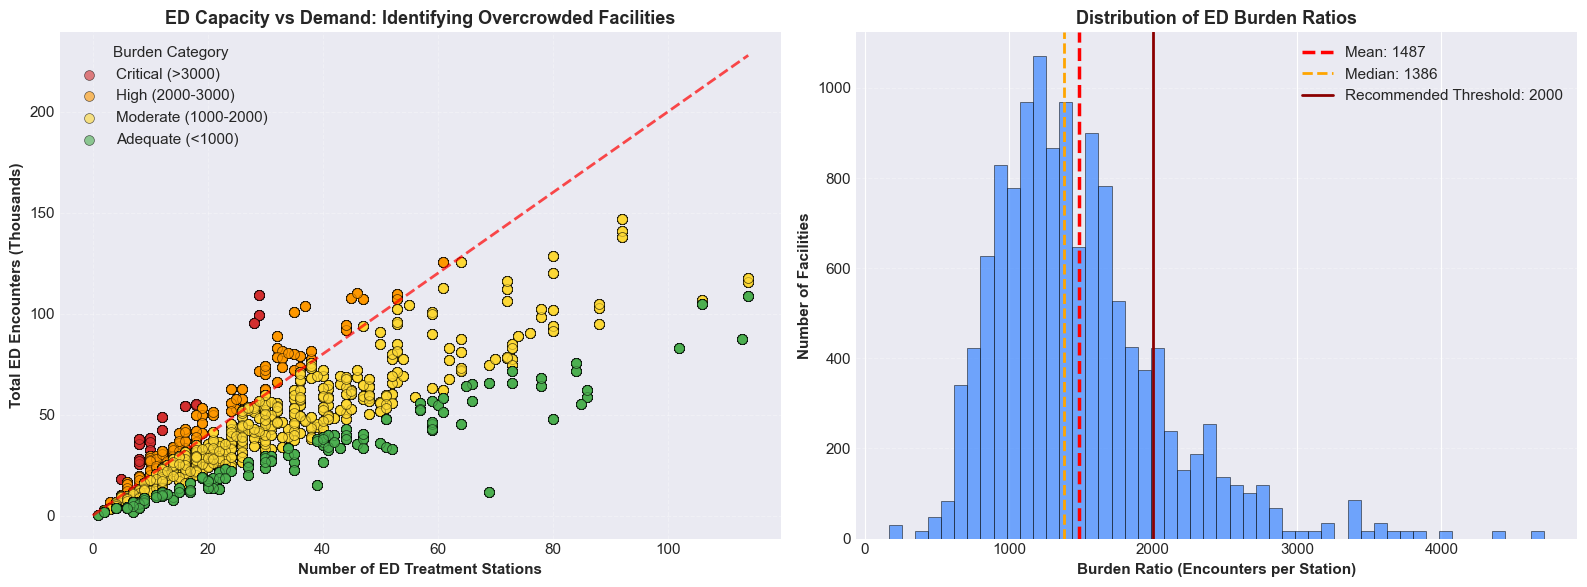


✓ Visualization saved: figures/10_capacity_burden_analysis.png


In [10]:
# Visualization 1: Scatter Plot - Encounters vs Treatment Stations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Scatter plot with burden categories
burden_colors = {
    'Critical (>3000)': '#D32F2F',
    'High (2000-3000)': '#FF9800',
    'Moderate (1000-2000)': '#FDD835',
    'Adequate (<1000)': '#4CAF50'
}

for category, color in burden_colors.items():
    mask = df_clean['Burden_Category'] == category
    ax1.scatter(df_clean[mask]['EDStations'], 
                df_clean[mask]['Tot_ED_NmbVsts']/1000,
                c=color, label=category, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Number of ED Treatment Stations', fontweight='bold')
ax1.set_ylabel('Total ED Encounters (Thousands)', fontweight='bold')
ax1.set_title('ED Capacity vs Demand: Identifying Overcrowded Facilities', 
              fontweight='bold', fontsize=13)
ax1.legend(loc='upper left', framealpha=0.9, title='Burden Category')
ax1.grid(True, alpha=0.3, linestyle='--')

# Add reference line for recommended ratio
x_range = np.array([0, df_clean['EDStations'].max()])
ax1.plot(x_range, x_range * 2000 / 1000, 'r--', linewidth=2, 
         label='Recommended Threshold (2000/station)', alpha=0.7)

# Right: Distribution of burden ratios
ax2.hist(df_clean['Burden_Ratio'], bins=50, color='#3A86FF', 
         alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(avg_burden, color='red', linestyle='--', linewidth=2.5,
            label=f'Mean: {avg_burden:.0f}')
ax2.axvline(median_burden, color='orange', linestyle='--', linewidth=2,
            label=f'Median: {median_burden:.0f}')
ax2.axvline(2000, color='darkred', linestyle='-', linewidth=2,
            label='Recommended Threshold: 2000')
ax2.set_xlabel('Burden Ratio (Encounters per Station)', fontweight='bold')
ax2.set_ylabel('Number of Facilities', fontweight='bold')
ax2.set_title('Distribution of ED Burden Ratios', fontweight='bold', fontsize=13)
ax2.legend(loc='upper right', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('figures/10_capacity_burden_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/10_capacity_burden_analysis.png")


---

## 5. Identifying Critical Facilities: Top 20 Most Burdened EDs

In [11]:
# Identify top 20 most burdened facilities
most_burdened = df_clean.nlargest(20, 'Burden_Ratio')[[
    'FacilityName2', 'CountyName', 'year', 'Tot_ED_NmbVsts', 'EDStations', 
    'Burden_Ratio', 'UrbanRuralDesi', 'LICENSED_BED_SIZE'
]].copy()

most_burdened.columns = ['Facility', 'County', 'Year', 'Encounters', 'Stations', 
                         'Burden_Ratio', 'Urban/Rural', 'Bed_Size']

print("="*120)
print("TOP 20 MOST BURDENED FACILITIES (REQUIRE URGENT CAPACITY EXPANSION)")
print("="*120)
print(most_burdened.to_string(index=False))

# Calculate capacity gap for top facilities
recommended_ratio = 2000
most_burdened['Stations_Needed'] = np.ceil(
    most_burdened['Encounters'] / recommended_ratio - most_burdened['Stations']
)
most_burdened['Stations_Needed'] = most_burdened['Stations_Needed'].clip(lower=0)

total_stations_needed = most_burdened['Stations_Needed'].sum()

print(f"\n{'='*120}")
print("CAPACITY GAP ANALYSIS FOR TOP 20 FACILITIES:")
print(f"{'='*120}")
print(f"Total additional treatment stations needed: {total_stations_needed:.0f}")
print(f"Estimated cost (at $500K per station): ${total_stations_needed * 0.5:.1f} million")
print(f"\nThese facilities need IMMEDIATE capacity assessment and expansion planning.")


TOP 20 MOST BURDENED FACILITIES (REQUIRE URGENT CAPACITY EXPANSION)
                    Facility      County  Year  Encounters  Stations  Burden_Ratio Urban/Rural Bed_Size
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50-99
St. Louise Regional Hospital Santa Clara  2023       37712       8.0       4714.00       Rural    50

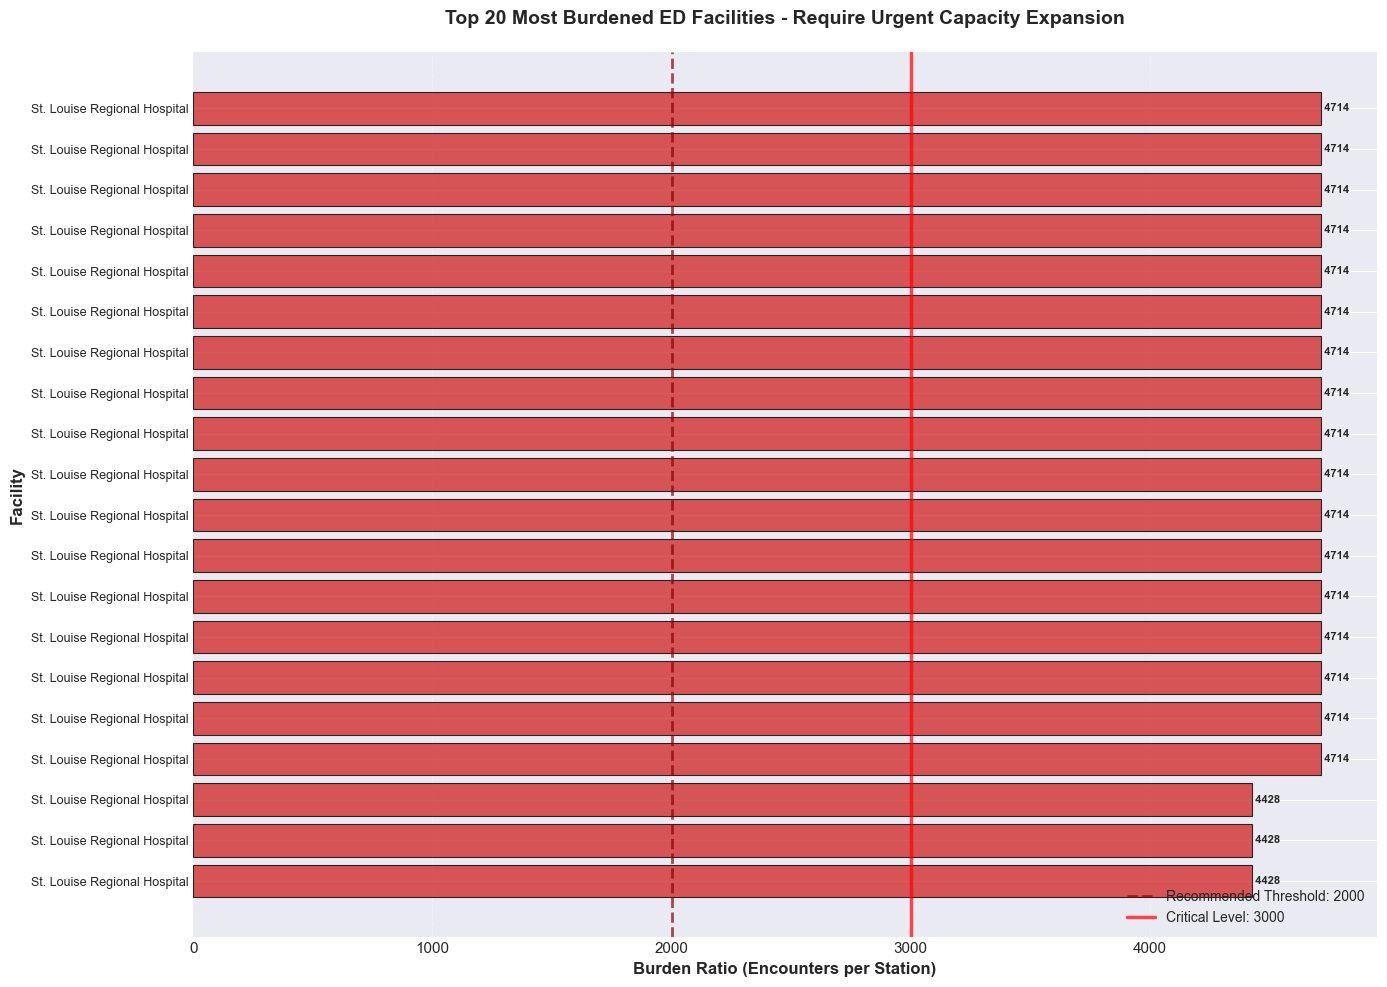


✓ Visualization saved: figures/11_top_20_burdened_facilities.png


In [12]:
# Visualization 2: Bar Chart - Top 20 Most Burdened Facilities
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Get top 20 and sort for better visualization
top_20 = df_clean.nlargest(20, 'Burden_Ratio').sort_values('Burden_Ratio')

# Color code by burden level
colors = ['#D32F2F' if x >= 3000 else '#FF9800' for x in top_20['Burden_Ratio']]

bars = ax.barh(range(len(top_20)), top_20['Burden_Ratio'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)

# Customize y-axis labels
labels = [f"{name[:40]}..." if len(name) > 40 else name 
          for name in top_20['FacilityName2']]
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(labels, fontsize=9)

ax.axvline(2000, color='darkred', linestyle='--', linewidth=2, 
           label='Recommended Threshold: 2000', alpha=0.7)
ax.axvline(3000, color='red', linestyle='-', linewidth=2.5,
           label='Critical Level: 3000', alpha=0.7)

ax.set_xlabel('Burden Ratio (Encounters per Station)', fontweight='bold', fontsize=12)
ax.set_ylabel('Facility', fontweight='bold', fontsize=12)
ax.set_title('Top 20 Most Burdened ED Facilities - Require Urgent Capacity Expansion', 
             fontweight='bold', fontsize=14, pad=20)
ax.legend(loc='lower right', framealpha=0.9, fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for i, (idx, row) in enumerate(top_20.iterrows()):
    ax.text(row['Burden_Ratio'], i, f" {row['Burden_Ratio']:.0f}",
            va='center', ha='left', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/11_top_20_burdened_facilities.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/11_top_20_burdened_facilities.png")


---

## 6. Geographic Analysis: County-Level Capacity Gaps

In [13]:
# County-level capacity analysis
county_capacity = df_clean.groupby('CountyName').agg({
    'Tot_ED_NmbVsts': 'sum',
    'EDStations': 'sum',
    'Burden_Ratio': 'mean',
    'FacilityName2': 'nunique'
}).reset_index()

county_capacity.columns = ['County', 'Total_Encounters', 'Total_Stations', 
                           'Avg_Burden_Ratio', 'Num_Facilities']
county_capacity['Overall_Ratio'] = county_capacity['Total_Encounters'] / county_capacity['Total_Stations']
county_capacity = county_capacity.sort_values('Avg_Burden_Ratio', ascending=False)

print("="*100)
print("COUNTY-LEVEL CAPACITY GAP ANALYSIS")
print("="*100)
print("\nTop 15 Counties by Average Burden Ratio:")
print(county_capacity.head(15).to_string(index=False))

# Identify high-burden counties
high_burden_counties = county_capacity[county_capacity['Avg_Burden_Ratio'] > 2000]

print(f"\n{'='*100}")
print(f"Counties with average burden > 2000: {len(high_burden_counties)}")
print(f"{'='*100}")
if len(high_burden_counties) > 0:
    for idx, row in high_burden_counties.head(10).iterrows():
        print(f"  • {row['County']:25s}: {row['Avg_Burden_Ratio']:6.0f} avg burden ({row['Num_Facilities']} facilities)")


COUNTY-LEVEL CAPACITY GAP ANALYSIS

Top 15 Counties by Average Burden Ratio:
        County  Total_Encounters  Total_Stations  Avg_Burden_Ratio  Num_Facilities  Overall_Ratio
        Merced           4234445          1836.0       2383.385897               2    2306.342593
      Monterey           7150795          3332.0       2374.099675               4    2146.096939
         Kings           4538252          2074.0       2201.631907               1    2188.163934
      Imperial           1874777           884.0       2169.925000               2    2120.788462
   Santa Clara          19060179         11730.0       2059.334401               7    1624.908696
    Santa Cruz           2101948          1088.0       2036.848958               2    1931.937500
        Tehama           1442875           714.0       2020.833333               1    2020.833333
        Madera           4445160          2210.0       1975.759868               2    2011.384615
          Lake           1912075         

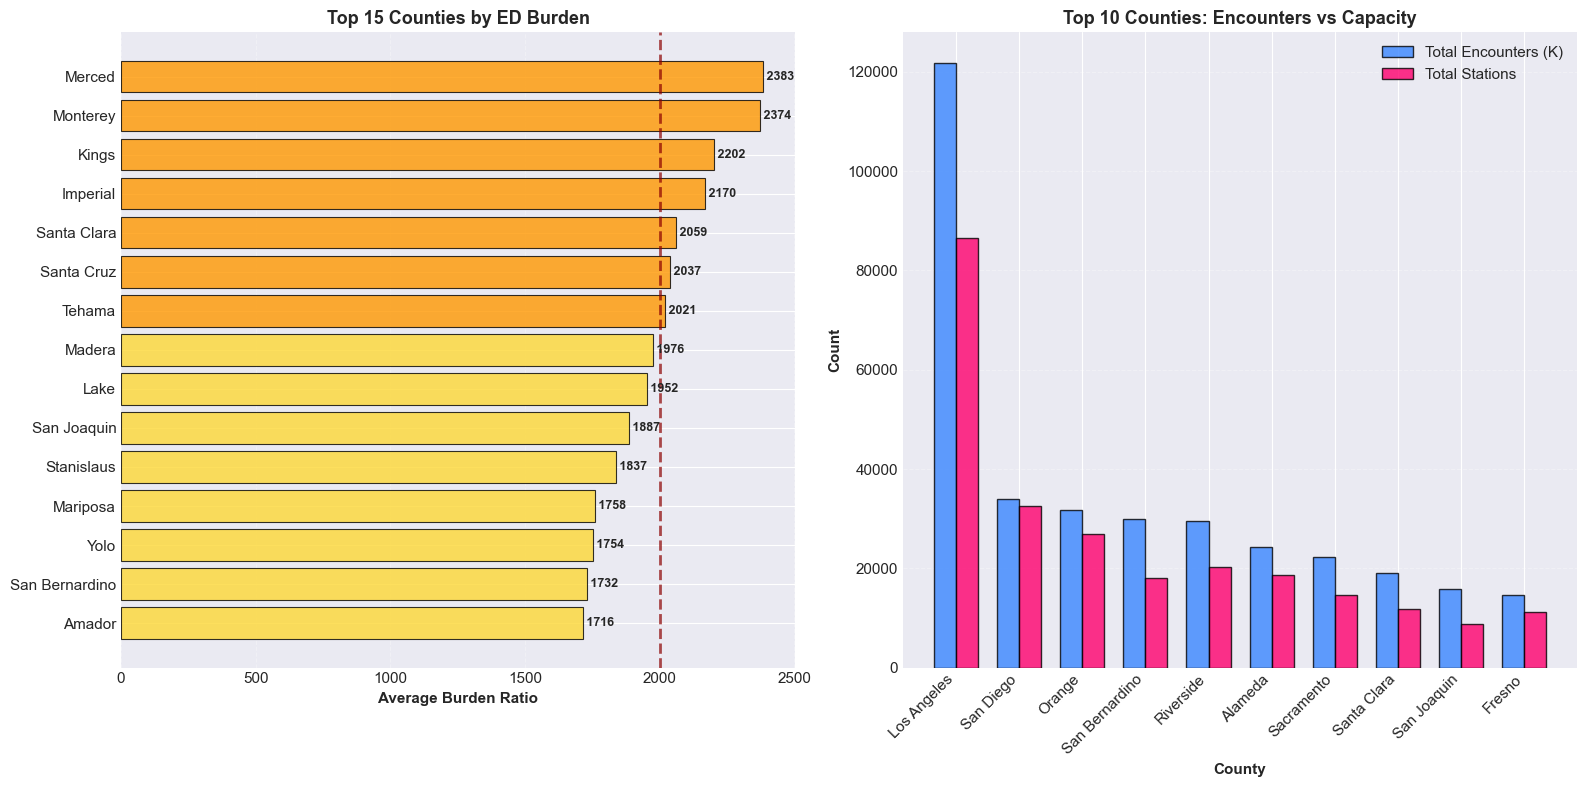


✓ Visualization saved: figures/12_county_capacity_gaps.png


In [14]:
# Visualization 3: Geographic Heat Map by County
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 counties by burden
top_counties = county_capacity.head(15).sort_values('Avg_Burden_Ratio')
colors_counties = ['#D32F2F' if x > 3000 else '#FF9800' if x > 2000 else '#FDD835' 
                   for x in top_counties['Avg_Burden_Ratio']]

ax1.barh(range(len(top_counties)), top_counties['Avg_Burden_Ratio'],
         color=colors_counties, alpha=0.8, edgecolor='black', linewidth=0.8)
ax1.set_yticks(range(len(top_counties)))
ax1.set_yticklabels(top_counties['County'])
ax1.axvline(2000, color='darkred', linestyle='--', linewidth=2, alpha=0.7)
ax1.set_xlabel('Average Burden Ratio', fontweight='bold')
ax1.set_title('Top 15 Counties by ED Burden', fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for i, (idx, row) in enumerate(top_counties.iterrows()):
    ax1.text(row['Avg_Burden_Ratio'], i, f" {row['Avg_Burden_Ratio']:.0f}",
            va='center', ha='left', fontsize=9, fontweight='bold')

# Stations vs Encounters by county (top 10)
top_10_volume = county_capacity.nlargest(10, 'Total_Encounters')
x = np.arange(len(top_10_volume))
width = 0.35

bars1 = ax2.bar(x - width/2, top_10_volume['Total_Encounters']/1000, width,
                label='Total Encounters (K)', color='#3A86FF', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, top_10_volume['Total_Stations'], width,
                label='Total Stations', color='#FF006E', alpha=0.8, edgecolor='black')

ax2.set_xlabel('County', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
ax2.set_title('Top 10 Counties: Encounters vs Capacity', fontweight='bold', fontsize=13)
ax2.set_xticks(x)
ax2.set_xticklabels([c[:15] for c in top_10_volume['County']], rotation=45, ha='right')
ax2.legend(loc='upper right', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('figures/12_county_capacity_gaps.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/12_county_capacity_gaps.png")


---

## 7. Urban vs Rural Capacity Disparities

In [15]:
# Urban/Rural comparison
urban_rural = df_clean.groupby('UrbanRuralDesi').agg({
    'Tot_ED_NmbVsts': 'sum',
    'EDStations': 'sum',
    'Burden_Ratio': ['mean', 'median'],
    'FacilityName2': 'nunique'
}).reset_index()

urban_rural.columns = ['Area_Type', 'Total_Encounters', 'Total_Stations', 
                       'Avg_Burden', 'Median_Burden', 'Num_Facilities']
urban_rural['Encounters_Per_Facility'] = urban_rural['Total_Encounters'] / urban_rural['Num_Facilities']
urban_rural['Stations_Per_Facility'] = urban_rural['Total_Stations'] / urban_rural['Num_Facilities']

print("="*100)
print("URBAN VS RURAL CAPACITY ANALYSIS")
print("="*100)
print(urban_rural.to_string(index=False))

# Key insights
urban_data = urban_rural[urban_rural['Area_Type'] == 'Urban'].iloc[0]
rural_data = urban_rural[urban_rural['Area_Type'] == 'Rural'].iloc[0]

print(f"\n{'='*100}")
print("KEY INSIGHTS:")
print(f"{'='*100}")
print(f"\nUrban Facilities:")
print(f"  • Average {urban_data['Stations_Per_Facility']:.1f} stations per facility")
print(f"  • Average burden: {urban_data['Avg_Burden']:.0f} encounters/station")
print(f"  • Handle {urban_data['Encounters_Per_Facility']:,.0f} encounters per facility")

print(f"\nRural Facilities:")
print(f"  • Average {rural_data['Stations_Per_Facility']:.1f} stations per facility")
print(f"  • Average burden: {rural_data['Avg_Burden']:.0f} encounters/station")
print(f"  • Handle {rural_data['Encounters_Per_Facility']:,.0f} encounters per facility")

burden_diff = ((urban_data['Avg_Burden'] - rural_data['Avg_Burden']) / rural_data['Avg_Burden']) * 100
print(f"\n⚠️  Urban facilities experience {burden_diff:+.1f}% {'higher' if burden_diff > 0 else 'lower'} burden than rural facilities")


URBAN VS RURAL CAPACITY ANALYSIS
Area_Type  Total_Encounters  Total_Stations  Avg_Burden  Median_Burden  Num_Facilities  Encounters_Per_Facility  Stations_Per_Facility
 Frontier           1521507          1539.0 1046.472820    1153.666667              11             1.383188e+05             139.909091
    Rural          51033828         34070.0 1569.125477    1437.500000              58             8.798936e+05             587.413793
    Urban         456450054        331336.0 1484.289625    1386.733333             246             1.855488e+06            1346.894309

KEY INSIGHTS:

Urban Facilities:
  • Average 1346.9 stations per facility
  • Average burden: 1484 encounters/station
  • Handle 1,855,488 encounters per facility

Rural Facilities:
  • Average 587.4 stations per facility
  • Average burden: 1569 encounters/station
  • Handle 879,894 encounters per facility

⚠️  Urban facilities experience -5.4% lower burden than rural facilities


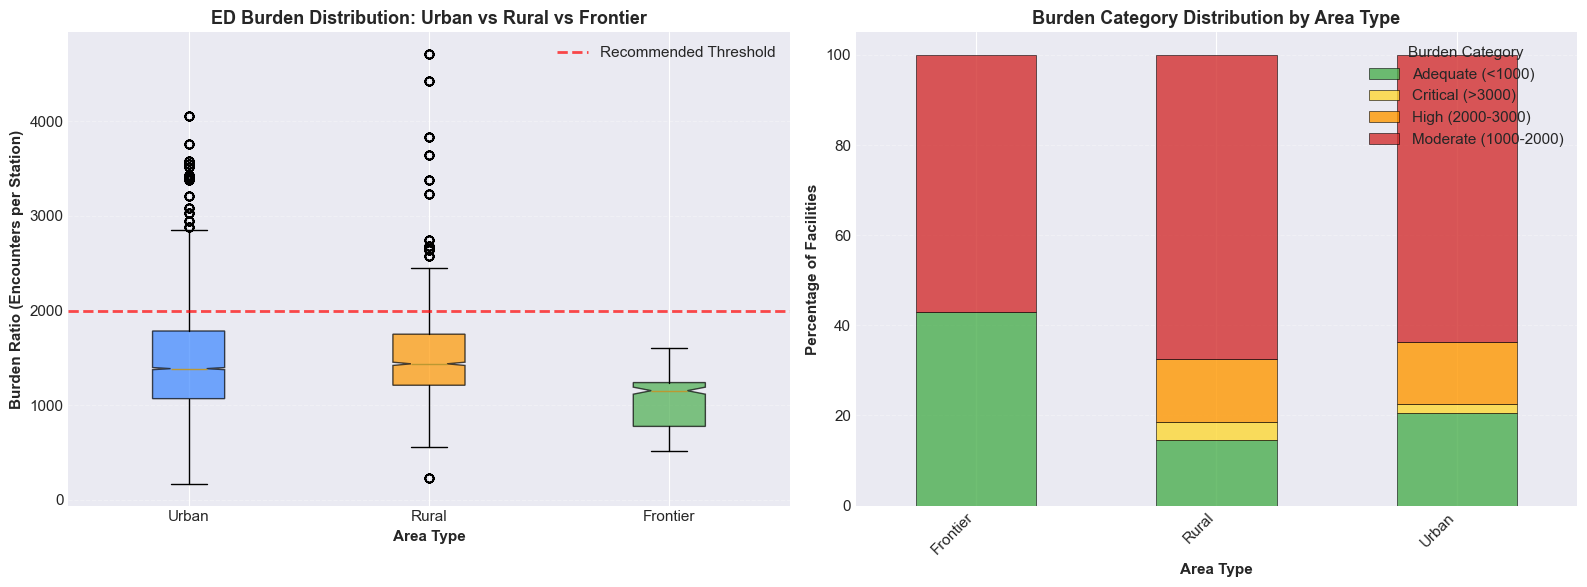


✓ Visualization saved: figures/13_urban_rural_burden_comparison.png


In [16]:
# Visualization 4: Box Plot - Burden Distribution by Urban/Rural
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot of burden by area type
area_order = ['Urban', 'Rural', 'Frontier'] if 'Frontier' in df_clean['UrbanRuralDesi'].unique() else ['Urban', 'Rural']
area_order = [a for a in area_order if a in df_clean['UrbanRuralDesi'].unique()]

bp = ax1.boxplot([df_clean[df_clean['UrbanRuralDesi'] == area]['Burden_Ratio'] 
                   for area in area_order],
                  labels=area_order,
                  patch_artist=True,
                  showfliers=True,
                  notch=True)

# Color the boxes
colors_box = ['#3A86FF', '#FF9800', '#4CAF50']
for patch, color in zip(bp['boxes'], colors_box[:len(area_order)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.axhline(2000, color='red', linestyle='--', linewidth=2, 
            label='Recommended Threshold', alpha=0.7)
ax1.set_ylabel('Burden Ratio (Encounters per Station)', fontweight='bold')
ax1.set_xlabel('Area Type', fontweight='bold')
ax1.set_title('ED Burden Distribution: Urban vs Rural vs Frontier', 
              fontweight='bold', fontsize=13)
ax1.legend(loc='upper right', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Burden category by area type
burden_by_area = pd.crosstab(df_clean['UrbanRuralDesi'], 
                              df_clean['Burden_Category'], 
                              normalize='index') * 100

burden_by_area.plot(kind='bar', stacked=True, ax=ax2, 
                    color=['#4CAF50', '#FDD835', '#FF9800', '#D32F2F'],
                    alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Percentage of Facilities', fontweight='bold')
ax2.set_xlabel('Area Type', fontweight='bold')
ax2.set_title('Burden Category Distribution by Area Type', 
              fontweight='bold', fontsize=13)
ax2.legend(title='Burden Category', loc='upper right', framealpha=0.9)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('figures/13_urban_rural_burden_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/13_urban_rural_burden_comparison.png")


---

## 8. Temporal Analysis: Burden Trends 2021-2023

In [17]:
# Year-over-year trend analysis
print("="*80)
print("TEMPORAL TREND ANALYSIS (2021-2023)")
print("="*80)
print("\nYearly Capacity Metrics:")
print(yearly_stats.to_string(index=False))

# Calculate year-over-year changes
if len(yearly_stats) >= 2:
    first_year = yearly_stats.iloc[0]
    last_year = yearly_stats.iloc[-1]
    
    encounter_growth = ((last_year['Total_Encounters'] - first_year['Total_Encounters']) / 
                       first_year['Total_Encounters']) * 100
    station_growth = ((last_year['Total_Stations'] - first_year['Total_Stations']) / 
                     first_year['Total_Stations']) * 100
    burden_change = ((last_year['Avg_Burden_Ratio'] - first_year['Avg_Burden_Ratio']) / 
                    first_year['Avg_Burden_Ratio']) * 100
    
    print(f"\n{'='*80}")
    print(f"CHANGE FROM {first_year['Year']:.0f} TO {last_year['Year']:.0f}:")
    print(f"{'='*80}")
    print(f"ED Encounters: {encounter_growth:+.2f}%")
    print(f"Treatment Stations: {station_growth:+.2f}%")
    print(f"Average Burden Ratio: {burden_change:+.2f}%")
    
    if burden_change > 0:
        print(f"\n⚠️  ED burden INCREASED by {burden_change:.1f}% → System capacity strain worsening")
    else:
        print(f"\n✓ ED burden DECREASED by {abs(burden_change):.1f}% → Capacity improvements effective")


TEMPORAL TREND ANALYSIS (2021-2023)

Yearly Capacity Metrics:
 Year  Total_Encounters  Total_Stations  Avg_Burden_Ratio  Num_Facilities
 2021         149861802        116566.0       1373.969629             247
 2022         175982001        126073.0       1514.081443             257
 2023         183161586        124306.0       1571.154673             252

CHANGE FROM 2021 TO 2023:
ED Encounters: +22.22%
Treatment Stations: +6.64%
Average Burden Ratio: +14.35%

⚠️  ED burden INCREASED by 14.4% → System capacity strain worsening


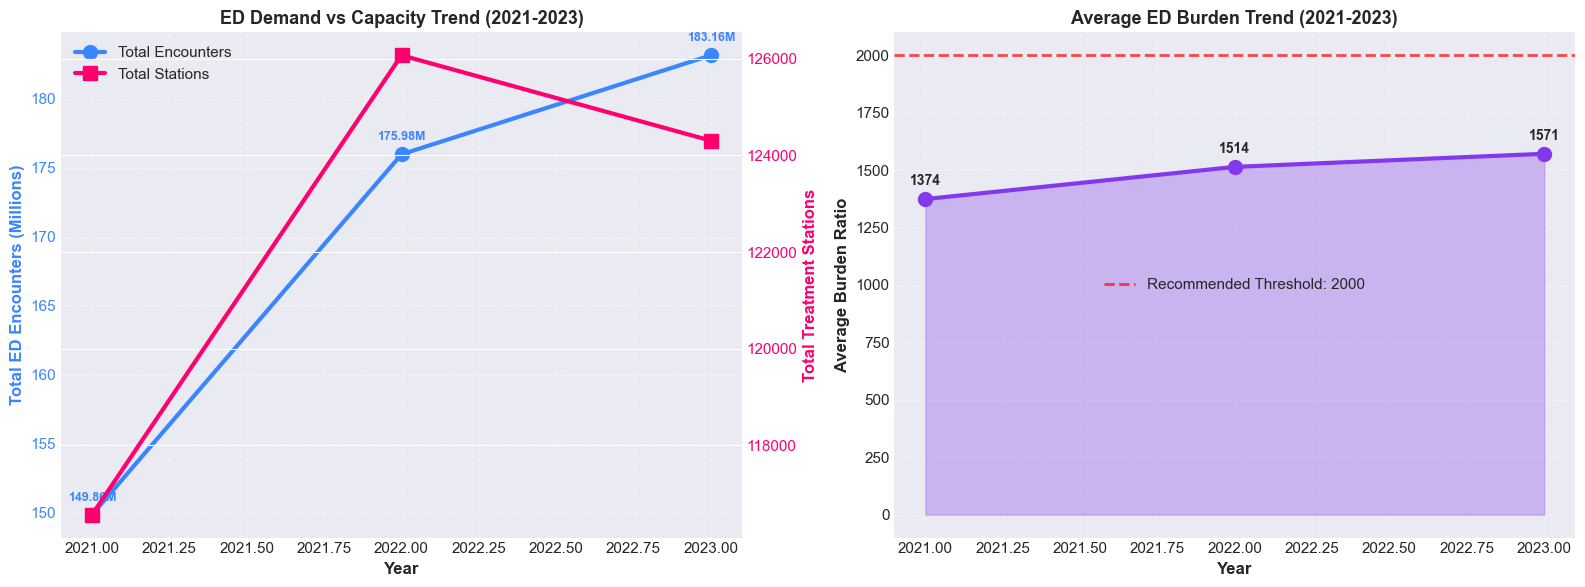


✓ Visualization saved: figures/14_temporal_burden_trends.png


In [18]:
# Visualization 5: Line Chart - Temporal Trends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Trend of encounters and stations
ax1_twin = ax1.twinx()
line1 = ax1.plot(yearly_stats['Year'], yearly_stats['Total_Encounters']/1e6,
                 marker='o', linewidth=3, markersize=10, color='#3A86FF',
                 label='Total Encounters')
line2 = ax1_twin.plot(yearly_stats['Year'], yearly_stats['Total_Stations'],
                      marker='s', linewidth=3, markersize=10, color='#FF006E',
                      label='Total Stations')

ax1.set_xlabel('Year', fontweight='bold', fontsize=12)
ax1.set_ylabel('Total ED Encounters (Millions)', fontweight='bold', fontsize=12, color='#3A86FF')
ax1_twin.set_ylabel('Total Treatment Stations', fontweight='bold', fontsize=12, color='#FF006E')
ax1.set_title('ED Demand vs Capacity Trend (2021-2023)', fontweight='bold', fontsize=13)
ax1.tick_params(axis='y', labelcolor='#3A86FF')
ax1_twin.tick_params(axis='y', labelcolor='#FF006E')
ax1.grid(True, alpha=0.3, linestyle='--')

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', framealpha=0.9)

# Add value labels
for idx, row in yearly_stats.iterrows():
    ax1.annotate(f"{row['Total_Encounters']/1e6:.2f}M",
                xy=(row['Year'], row['Total_Encounters']/1e6),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold', color='#3A86FF')

# Trend of average burden ratio
ax2.plot(yearly_stats['Year'], yearly_stats['Avg_Burden_Ratio'],
         marker='o', linewidth=3, markersize=10, color='#8338EC')
ax2.fill_between(yearly_stats['Year'], yearly_stats['Avg_Burden_Ratio'],
                 alpha=0.3, color='#8338EC')
ax2.axhline(2000, color='red', linestyle='--', linewidth=2,
            label='Recommended Threshold: 2000', alpha=0.7)
ax2.set_xlabel('Year', fontweight='bold', fontsize=12)
ax2.set_ylabel('Average Burden Ratio', fontweight='bold', fontsize=12)
ax2.set_title('Average ED Burden Trend (2021-2023)', fontweight='bold', fontsize=13)
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')

# Add value labels
for idx, row in yearly_stats.iterrows():
    ax2.annotate(f"{row['Avg_Burden_Ratio']:.0f}",
                xy=(row['Year'], row['Avg_Burden_Ratio']),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/14_temporal_burden_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: figures/14_temporal_burden_trends.png")


---

## 9. Comprehensive Summary and Recommendations

In [19]:
# Generate comprehensive summary statistics
print("="*100)
print("EXECUTIVE SUMMARY: ED CAPACITY GAPS AND OPERATIONAL BOTTLENECKS (2021-2023)")
print("="*100)

# Overall statistics
critical_facilities = (df_clean['Burden_Ratio'] >= 3000).sum()
high_facilities = ((df_clean['Burden_Ratio'] >= 2000) & (df_clean['Burden_Ratio'] < 3000)).sum()
above_threshold = (df_clean['Burden_Ratio'] > 2000).sum()
total_fac = len(df_clean)

print(f"\n1. SYSTEM-WIDE CAPACITY STATUS:")
print(f"   • {critical_facilities} facilities operate with CRITICAL burden (>3000 encounters/station)")
print(f"   • {high_facilities} facilities have HIGH burden (2000-3000 encounters/station)")
print(f"   • {(above_threshold/total_fac*100):.1f}% of facilities exceed recommended threshold (2000)")
print(f"   • Average system burden: {avg_burden:.0f} encounters/station")
print(f"   • Median system burden: {median_burden:.0f} encounters/station")

# Geographic findings
worst_county = county_capacity.iloc[0]
print(f"\n2. GEOGRAPHIC CAPACITY GAPS:")
print(f"   • {worst_county['County']} has highest average burden: {worst_county['Avg_Burden_Ratio']:.0f} encounters/station")
print(f"   • {len(high_burden_counties)} counties have average burden > 2000")

# Urban/Rural
print(f"\n3. URBAN vs RURAL DISPARITIES:")
if 'Urban' in urban_rural['Area_Type'].values and 'Rural' in urban_rural['Area_Type'].values:
    urban_burden = urban_rural[urban_rural['Area_Type']=='Urban']['Avg_Burden'].values[0]
    rural_burden = urban_rural[urban_rural['Area_Type']=='Rural']['Avg_Burden'].values[0]
    print(f"   • Urban facilities average {urban_burden:.0f} encounters/station")
    print(f"   • Rural facilities average {rural_burden:.0f} encounters/station")
    print(f"   • Urban facilities have {((urban_burden-rural_burden)/rural_burden*100):+.1f}% burden vs rural")

# Temporal trends
if len(yearly_stats) >= 2:
    print(f"\n4. TEMPORAL TRENDS (2021-2023):")
    print(f"   • ED encounters {'increased' if encounter_growth > 0 else 'decreased'} by {abs(encounter_growth):.1f}%")
    print(f"   • Treatment stations {'increased' if station_growth > 0 else 'decreased'} by {abs(station_growth):.1f}%")
    print(f"   • Average burden {'increased' if burden_change > 0 else 'decreased'} by {abs(burden_change):.1f}%")

print(f"\n5. CAPACITY EXPANSION NEEDS:")
print(f"   • Top 20 burdened facilities need {total_stations_needed:.0f} additional treatment stations")
print(f"   • Estimated capital investment: ${total_stations_needed * 0.5:.1f} million (at $500K/station)")
print(f"   • Immediate capacity assessment required for {critical_facilities} critical facilities")

print(f"\n{'='*100}")
print("ANALYSIS COMPLETE")
print(f"{'='*100}")


EXECUTIVE SUMMARY: ED CAPACITY GAPS AND OPERATIONAL BOTTLENECKS (2021-2023)

1. SYSTEM-WIDE CAPACITY STATUS:
   • 306 facilities operate with CRITICAL burden (>3000 encounters/station)
   • 1715 facilities have HIGH burden (2000-3000 encounters/station)
   • 15.7% of facilities exceed recommended threshold (2000)
   • Average system burden: 1487 encounters/station
   • Median system burden: 1386 encounters/station

2. GEOGRAPHIC CAPACITY GAPS:
   • Merced has highest average burden: 2383 encounters/station
   • 7 counties have average burden > 2000

3. URBAN vs RURAL DISPARITIES:
   • Urban facilities average 1484 encounters/station
   • Rural facilities average 1569 encounters/station
   • Urban facilities have -5.4% burden vs rural

4. TEMPORAL TRENDS (2021-2023):
   • ED encounters increased by 22.2%
   • Treatment stations increased by 6.6%
   • Average burden increased by 14.4%

5. CAPACITY EXPANSION NEEDS:
   • Top 20 burdened facilities need 217 additional treatment stations
   

---

## References

**Primary Data Source:**
- California Department of Health Care Access and Information (HCAI)
- Dataset: Emergency Department Volume and Capacity (2021-2023)
- Source: https://data.chhs.ca.gov/dataset/emergency-department-volume-and-capacity

**Analysis Tools:**
- Python 3.x
- Pandas, NumPy (Data Analysis)
- Matplotlib, Seaborn (Visualization)
- Jupyter Notebook (Analysis Environment)

---

*Analysis completed as part of the BDM Capstone Project*  
*Indian Institute of Technology, Madras - Online BS Degree Program*